### Demonstrate K means clustering by using, Quantum Euclidean distance. 

In [ ]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import *
import numpy as np
from collections import defaultdict
from random import randrange

In [ ]:
IMAX = 2000
IMIN = 1000
data_x_max = IMAX
data_x_min = IMIN

data_y_max = IMAX
data_y_min = IMIN

# split the angle pi/2 into max-min points. 
theta_split = np.pi/(2*(data_x_max - data_x_min))
lambda_split = np.pi/(2*(data_y_max - data_y_min))

data = [tuple([randrange(IMIN,IMAX),randrange(IMIN,IMAX)]) for i in range(5000)]
data = list(set(data))

data_orig = data[:]

def convert_point_to_bloch_sphere(data_points):
    return [np.array([d[0]*theta_split, d[1]*lambda_split]) for d in data_points]

centroids = np.array([[data_x_min,data_y_min],[data_x_max,data_y_max],[data_x_max,data_y_min],[data_x_min,data_y_max],[(IMIN+IMAX)//2,(IMIN+IMAX)//2]])

color = ["red", "green", "blue", "purple", "yellow"]

colorMap = {
    "red": 0,
    "green": 1,
    "blue": 2,
    "purple": 3,
    "yellow": 4
}

dist = defaultdict(lambda: {"d": float('inf'), "c": None})

data = convert_point_to_bloch_sphere(data)
centroids_bloch = convert_point_to_bloch_sphere(centroids)

In [ ]:
def EuclideanDistance(v1, v2):
    anc = QuantumRegister(1)
    psi = QuantumRegister(1)
    anc1 = QuantumRegister(1)
    anc2 = QuantumRegister(1, name="anc")
    creg = ClassicalRegister(1)

    QC = QuantumCircuit(anc2, anc1, anc, psi , creg)

    la = np.linalg.norm(v1)
    lb = np.linalg.norm(v2)

    Z_norm = np.linalg.norm([la,lb])

    Z = la**2 + lb**2

    QC.prepare_state([la/Z_norm, -lb/Z_norm], anc1[0], label="Init state")

    QC.h(anc[0])
    QC.cu(v1[0], v1[1], 0, 0, 2, 3)

    QC.x(anc[0])
    QC.cu(v2[0], v2[1], 0, 0, 2, 3)
    QC.x(anc[0])

    QC.h(anc2[0])
    QC.cswap(anc2[0], anc[0], anc1[0])
    QC.h(anc2[0])

    QC.measure(anc2[0], 0)

    backend = Aer.get_backend("qasm_simulator")
    nShots  = 5000
    job_sim = backend.run(transpile(QC, backend), shots=nShots)
    counts = job_sim.result().get_counts()
    
    if '0' in counts:
        b = counts['0']
    else:
        b = 0
        
    P0 = counts['0']/nShots

    return round( np.sqrt(abs(4*Z*P0 - 2*Z)),10)

In [ ]:
points_changed = True
iter = 0
while points_changed and iter < 5:
    points_changed = False
    new_centroids = [[0,0,0] for i in range(len(centroids))]
    for c in range(len(centroids)):
        print (iter, "Centoid = ", c)
        for i in range(len(data)):
            distance = EuclideanDistance(data[i], centroids_bloch[c])
            od = tuple(data_orig[i])
            # print ((data_orig[i], centroids_bloch[c]), "EuclideanDistance : ", distance)
            if distance < dist[od]["d"]:
                points_changed = True
                dist[od]["c"] = color[c]
                dist[od]["d"] = distance

    if points_changed:
        for k,v in dist.items():
            # print(k,v, colorMap[v["c"]])
            new_centroids[colorMap[v["c"]]][0]+= k[0]
            new_centroids[colorMap[v["c"]]][1]+= k[1]
            new_centroids[colorMap[v["c"]]][2]+= 1
        for c in range(len(centroids)):
            new_centroids[c][0]=int(new_centroids[c][0]/new_centroids[c][2])
            new_centroids[c][1]=int(new_centroids[c][1]/new_centroids[c][2])
    
    print ("new centroids", new_centroids)
    if centroids != new_centroids:
        centroids = new_centroids
    else: 
        break
    iter += 1
                
x = []
y = []
colors = []

for k,v in dist.items():
    x.append(k[0])
    y.append(k[1])
    colors.append(v["c"])



0 Centoid =  0
0 Centoid =  1
0 Centoid =  2
0 Centoid =  3
0 Centoid =  4
new centroids [[1235, 1163, 775], [1788, 1880, 519], [1786, 1127, 531], [1249, 1861, 736], [1537, 1513, 2424]]
1 Centoid =  0


/var/folders/n5/sr7wwb8n1wggd7jsk_k37l_w0000gn/T/ipykernel_82913/2622943888.py:28: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if centroids != new_centroids:


1 Centoid =  1
1 Centoid =  2
1 Centoid =  3
1 Centoid =  4
new centroids [[1228, 1158, 735], [1792, 1877, 524], [1779, 1126, 549], [1246, 1862, 741], [1534, 1511, 2436]]
2 Centoid =  0
2 Centoid =  1
2 Centoid =  2
2 Centoid =  3
2 Centoid =  4
new centroids [[1225, 1157, 727], [1787, 1878, 535], [1782, 1125, 550], [1243, 1862, 738], [1534, 1509, 2435]]
3 Centoid =  0
3 Centoid =  1
3 Centoid =  2
3 Centoid =  3
3 Centoid =  4
new centroids [[1226, 1156, 727], [1790, 1876, 536], [1781, 1123, 544], [1247, 1864, 742], [1533, 1508, 2436]]
4 Centoid =  0
4 Centoid =  1
4 Centoid =  2
4 Centoid =  3
4 Centoid =  4
new centroids [[1228, 1154, 724], [1788, 1877, 537], [1783, 1123, 541], [1244, 1863, 738], [1533, 1508, 2445]]


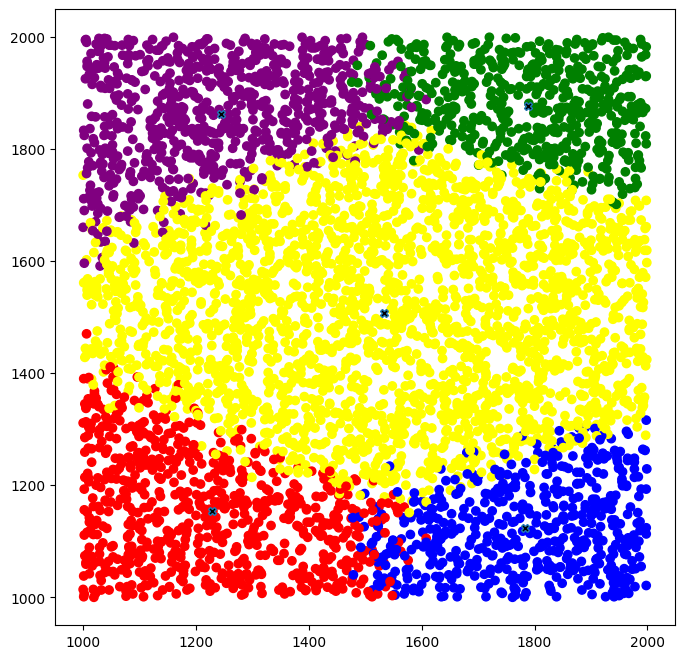

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axisartist import SubplotZero
fig = plt.figure(figsize=(8, 8))
a,b,c = zip(*centroids)
plt.plot(a,b, "X", markerfacecolor="black",s=20)
plt.scatter(x,y,c=colors)

plt.show()